# Imports And Consts

In [14]:
DIRECTORIES = [
    "./Results/Limited",
    "./Results/Limited/MLP",
    "./Results/Limited/XGBoost",
]

In [15]:
OLD_COLUMNS = [
    "score",
    "numberOfTruePositives",
    "accuracy",
    "precision",
    "numberOfFeatures",
    "model",
    "model_parameters",
    "feature_selector",
    "selector_parameters",
]

NEW_COLUMNS = [
    "score",
    "numberOfTruePositives",
    "accuracy",
    "precision",
    "numberOfFeatures",
    "model",
    "model_parameters",
    "feature_selector",
    "selector_parameters",
    "scaler",
    "scaler_parameters",
    "feature_generator",
    "feature_generator_parameters",
]

In [16]:
import os
import os.path
import pickle
import pandas as pd
import functions
import seaborn as sns
import matplotlib.pyplot as plt

# Load Files

In [17]:
results = []
for directory in DIRECTORIES:
    for f in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, f)):
            with open(os.path.join(directory, f), "rb") as input_file:
                results.append(pickle.load(input_file))

In [18]:
for i, result in enumerate(results):
    if len(result[0]) == 9:
        results[i] = pd.DataFrame(result, columns=OLD_COLUMNS)
        functions.addColumnsScalerGenerator(results[i])
    else:
        results[i] = pd.DataFrame(result, columns=NEW_COLUMNS)

In [46]:
allResults = pd.concat(results, ignore_index=True)

In [50]:
allResults.iloc[allResults["score"].idxmax()]

score                                                                    0.617737
numberOfTruePositives                                                         242
accuracy                                                                  0.56303
precision                                                                0.572519
numberOfFeatures                                                                2
model                                                               MLPClassifier
model_parameters                {'activation': 'relu', 'solver': 'adam', 'beta...
feature_selector                                                            KBest
selector_parameters             {'score_func': <function mutual_info_classif a...
feature_generator_parameters                                                   {}
feature_generator                                             NoFeatureGeneration
scaler_parameters                                                              {}
scaler          

In [20]:
allResults

,score,numberOfTruePositives,accuracy,precision,numberOfFeatures,model,model_parameters,feature_selector,selector_parameters,feature_generator_parameters,feature_generator,scaler_parameters,scaler
0,-15.818627,319,0.500606,0.495192,500,LDA,{'solver': 'svd'},NoFeatureSelection,{},NaN,NoFeatureGeneration,NaN,NoScaling
1,-15.785948,339,0.513333,0.506639,500,QDA,{},NoFeatureSelection,{},NaN,NoFeatureGeneration,NaN,NoScaling
2,-15.808824,325,0.509091,0.503555,500,KNN,{'n_neighbors': 5},NoFeatureSelection,{},NaN,NoFeatureGeneration,NaN,NoScaling
3,-15.602941,451,0.662424,0.660074,500,GradientBoosting,{},NoFeatureSelection,{},NaN,NoFeatureGeneration,NaN,NoScaling
4,-15.620915,440,0.657576,0.643757,500,HistGradientBoosting,{},NoFeatureSelection,{},NaN,NoFeatureGeneration,NaN,NoScaling
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-0.039755,187,0.493939,0.494175,10,XGBoost,"{'max_depth': 3, 'eta': 0.0001, 'objective': '...",RFE,"{'estimator': SVC(kernel='linear'), 'n_feature...",{'degree': 2},Polynomial,{},Robust
896,-0.039755,187,0.493939,0.494175,10,XGBoost,"{'max_depth': 3, 'eta': 0.0001, 'objective': '...",RFE,"{'estimator': SVC(kernel='linear'), 'n_feature...",{'degree': 2},Polynomial,{},Robust
897,-0.048930,184,0.518788,0.512249,10,XGBoost,"{'max_depth': 3, 'eta': 0.01, 'objective': 'bi...",RFE,"{'estimator': SVC(kernel='linear'), 'n_feature...",{'degree': 2},Polynomial,{},Robust
898,-0.048930,184,0.518788,0.512249,10,XGBoost,"{'max_depth': 3, 'eta': 0.01, 'objective': 'bi...",RFE,"{'estimator': SVC(kernel='linear'), 'n_feature...",{'degree': 2},Polynomial,{},Robust


# All unique parameters

Note that not all of these combinations were tested, but at some point each of these parameters was tested

In [32]:
params = functions.extractAllUniqueParameters(
    allResults,
    [
        "model",
        "feature_selector",
        "scaler",
        "feature_generator",
    ],
    [
        "model_parameters",
        "selector_parameters",
        "scaler_parameters",
        "feature_generator_parameters",
    ],
)

In [33]:
temp = {}
for paramKey in params.keys():
    if paramKey == "NoScaling" or paramKey == "NoFeatureGeneration":
        temp[paramKey] = {}
        continue
    if paramKey == "Voting":
        params["Voting"] = params["Voting"].explode("estimators")
    temp[paramKey] = {}
    for col in params[paramKey]:
        temp[paramKey][col] = params[paramKey][col].unique()

In [34]:
params["Voting"].explode("estimators")

,estimators,voting
0,1,soft
0,"GradientBoostingClassifier(learning_rate=0.01,...",soft
0,2,soft
0,"MLPClassifier(max_iter=800, random_state=42)",soft
0,3,soft
...,...,...
28,"GradientBoostingClassifier(learning_rate=0.01,...",soft
28,2,soft
28,"MLPClassifier(max_iter=800, random_state=42)",soft
28,3,soft


In [35]:
temp

{'ADABoost': {'estimator': array([GradientBoostingClassifier(learning_rate=0.01, loss='exponential',
                                    n_estimators=800, random_state=42)     ,
         GradientBoostingClassifier(learning_rate=0.001, loss='exponential',
                                    n_estimators=800, random_state=42)      ,
         DecisionTreeClassifier()], dtype=object),
  'n_estimators': array([50], dtype=int64),
  'learning_rate': array([1.  , 0.5 , 0.1 , 0.01]),
  'random_state': array([42], dtype=int64)},
 'GradientBoosting': {'loss': array([nan, 'exponential', 'log_loss'], dtype=object),
  'learning_rate': array([  nan, 0.01 , 0.001, 0.1  ]),
  'n_estimators': array([ nan, 100., 200., 300., 500., 800., 400.]),
  'subsample': array([nan, 1. , 0.7]),
  'max_depth': array([nan,  2.,  3.,  5.,  8.]),
  'random_state': array([nan, 42.]),
  'max_features': array([nan,  3.,  5.,  8.]),
  'ccp_alpha': array([ nan, 0.  , 0.01, 0.05, 0.1 ]),
  'min_samples_split': array([nan,  2.,

## Results summary


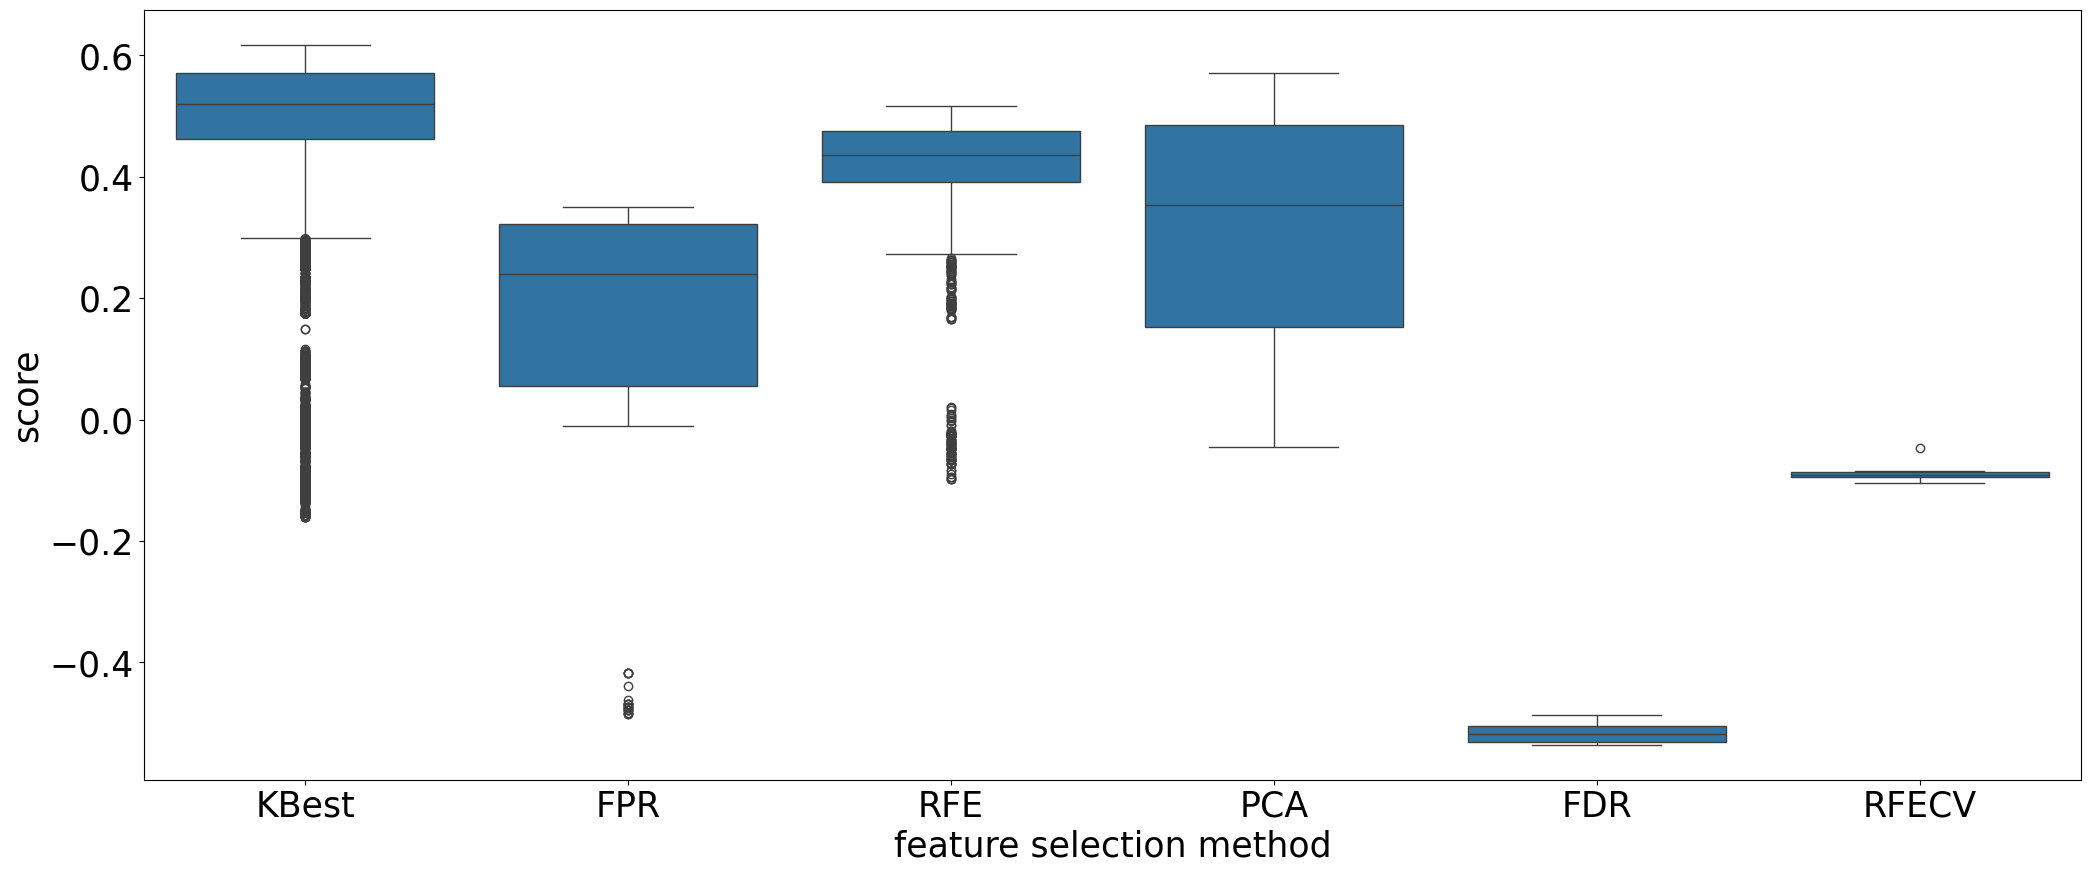

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

noOutliers = allResults[(np.abs(stats.zscore(allResults["score"])) < 4)]
plt.figure(figsize=(25, 10))
plt.rc("font", **{"size": 25})
noOutliers = noOutliers.drop(
    noOutliers[noOutliers["feature_selector"] == "NoFeatureSelection"].index
)
sns.boxplot(data=noOutliers, x="feature_selector", y="score")
plt.xlabel("feature selection method")
plt.savefig("selector_results.eps")

C:\Users\mateu\AppData\Local\Temp\ipykernel_28600\1155441107.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  noOutliers["model"][noOutliers["model"] == "HistGradientBoosting"] = "HistGB"
C:\Users\mateu\AppData\Local\Temp\ipykernel_28600\

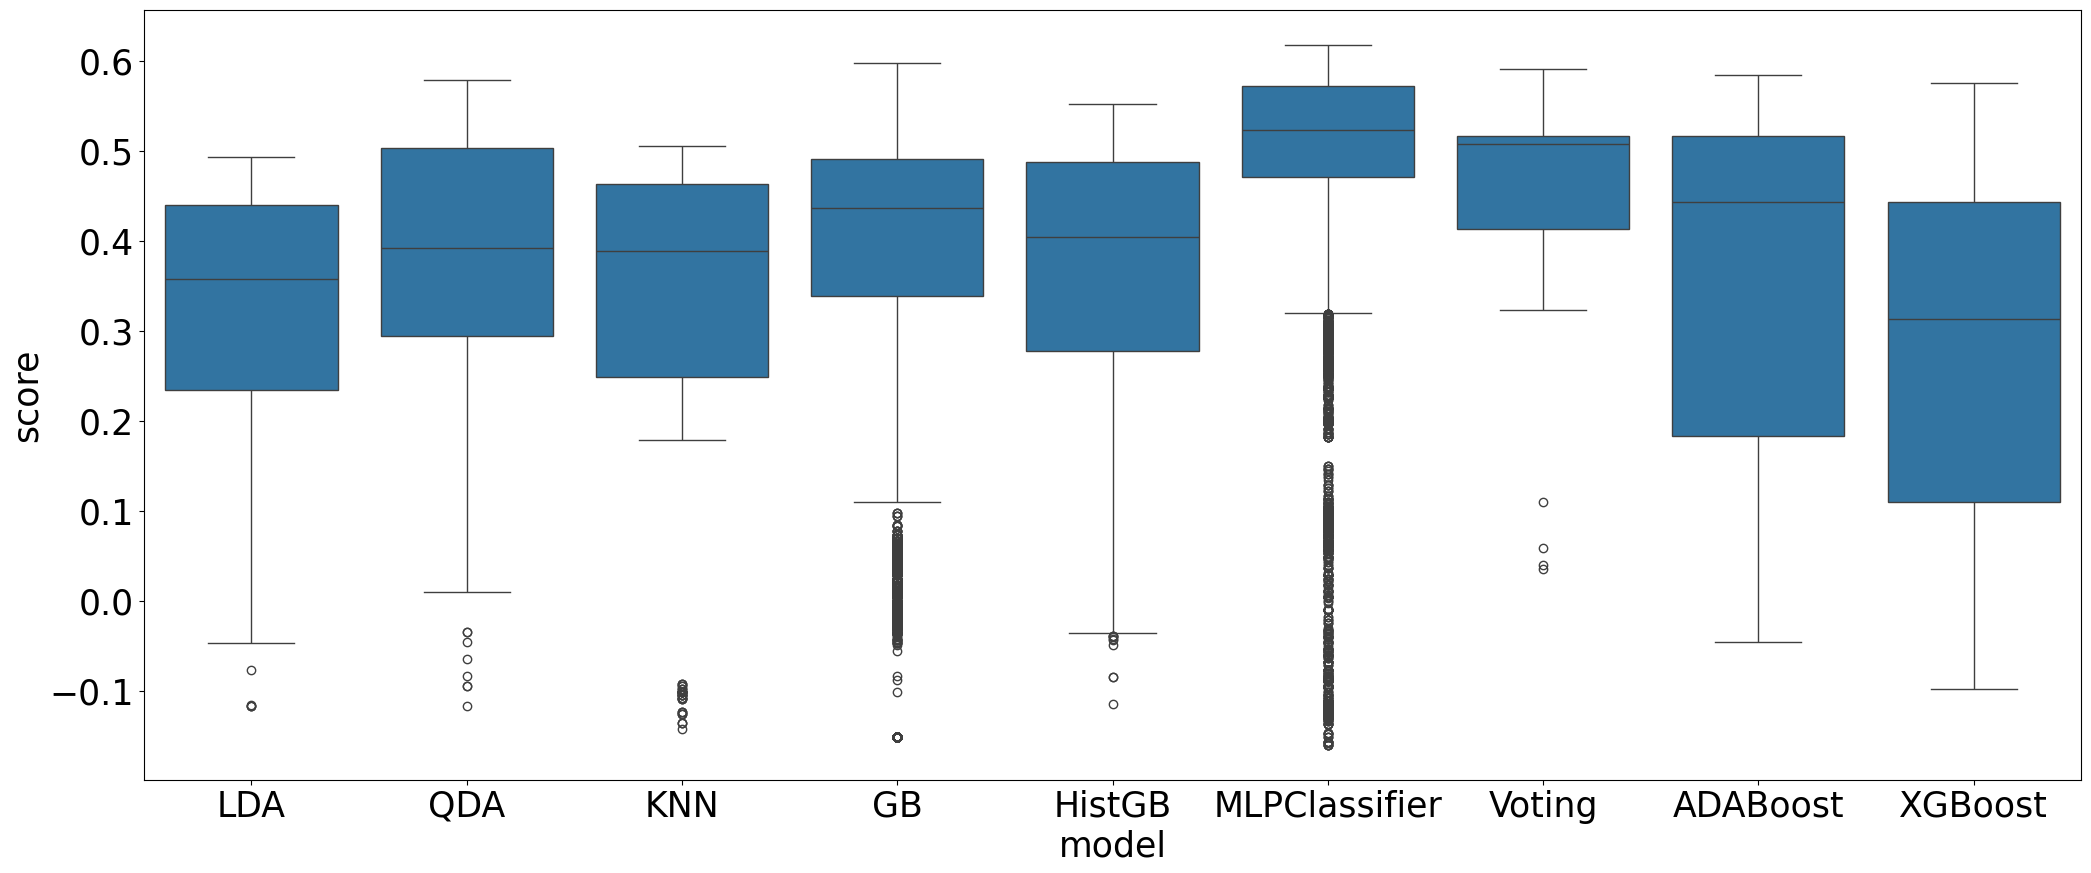

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

noOutliers = allResults[(np.abs(stats.zscore(allResults["score"])) < 3)]
plt.figure(figsize=(25, 10))
plt.rc("font", **{"size": 25})
noOutliers["model"][noOutliers["model"] == "HistGradientBoosting"] = "HistGB"
noOutliers["model"][noOutliers["model"] == "GradientBoosting"] = "GB"
sns.boxplot(data=noOutliers, x="model", y="score")
plt.xlabel("model")
plt.savefig("model_results.eps")